In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
X = pd.read_csv('train/train.csv')

In [3]:
X_train = X.sample(frac=0.7, random_state=0)
X_val = X.drop(X_train.index)

y_train = X_train.pop('label')
y_val = X_val.pop('label')

In [4]:
X_train = np.asarray(X_train)
X_train = X_train.reshape(29400, 28, 28, 1)

X_val = np.asarray(X_val)
X_val = X_val.reshape(12600,28,28, 1)

y_train = np.asarray(y_train)
y_train = to_categorical(y_train, num_classes=10, dtype='int')

y_val = np.asarray(y_val)
y_val = to_categorical(y_val, num_classes=10, dtype='int')

In [5]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [6]:
X_train.shape

(29400, 28, 28, 1)

In [41]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001,
    patience=20,
    restore_best_weights=True,)

In [8]:
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=[*X_train.shape[1:]]),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])
#6 iter
#0.9820 accuracy
#patience = 5

In [9]:
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=[*X_train.shape[1:]]),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])
#11 iter
#0.9860 accuracy
#patience = 5

In [39]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=[*X_train.shape[1:]]),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])
#11 iter
#0.9891 accuracy
#patience = 4

In [40]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],)

In [26]:
X_val.shape

(12600, 28, 28, 1)

In [27]:
y_val.shape

(12600, 10)

In [42]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    epochs=50,
    )

Epoch 1/50
919/919 [==============================] - 22s 23ms/step - loss: 0.2402 - accuracy: 0.9248 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 2/50
919/919 [==============================] - 20s 22ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0695 - val_accuracy: 0.9791
Epoch 3/50
919/919 [==============================] - 21s 23ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0541 - val_accuracy: 0.9839
Epoch 4/50
919/919 [==============================] - 20s 22ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 5/50
919/919 [==============================] - 21s 22ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0685 - val_accuracy: 0.9803
Epoch 6/50
919/919 [==============================] - 20s 22ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0484 - val_accuracy: 0.9884
Epoch 7/50
919/919 [==============================] - 21s 23ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0529 - val_accuracy:

In [43]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.125165,0.961429,0.059786,0.981508
1,0.047943,0.985306,0.069492,0.979127
2,0.032479,0.989320,0.054074,0.983889
3,0.025905,0.991054,0.053669,0.985000
4,0.019676,0.993639,0.068478,0.980317
5,0.018518,0.993775,0.048353,0.988413
6,0.014501,0.995136,0.052945,0.985714
7,0.014652,0.995238,0.049735,0.987143
8,0.010239,0.996293,0.054940,0.984603
9,0.011173,0.996088,0.054483,0.986905


Minimum Validation Loss: 0.0484


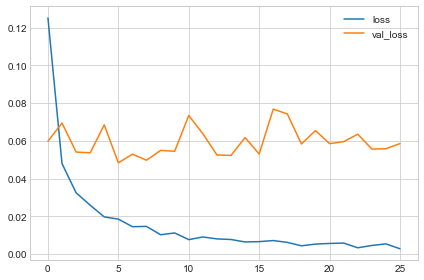

In [44]:
history_df.loc[:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Maximum Validation accuracy: 0.9893


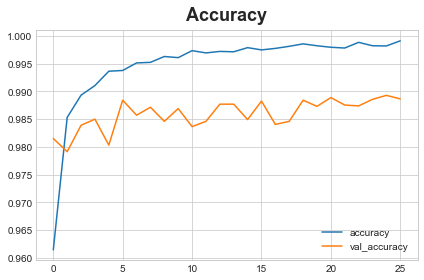

In [45]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");
print(("Maximum Validation accuracy: {:0.4f}").format(history_df['val_accuracy'].max()))